**Minimum Residual**

Метод MINRES - это итерационный метод для решения систем линейных уравнений вида $Ax=b$ для spd матриц.

MINRES основан на минимизации невязки (residual) $Ax - b$ в пространстве Крылова. 

Алгоритм метода MINRES можно описать следующим образом:

Начальное приближение $x_0$ задается произвольно, например, вектором нулей.
Вычисляются начальные значения $r_0 = b - Ax_0$ и $p_0 = r_0$.
Далее происходит итерационный процесс. На каждой итерации k вычисляются:
$\alpha_{k-1} = \frac{(Ap_{k-1}, r_{k-1})}{(Ap_{k-1}, Ap_{k-1})}$, где $(u, v)$ -- скалярное произведение векторов $u$ и $v$.

$x_k = x_{k-1} + \alpha_{k-1} p_{k-1}$.
$r_k = r_{k-1} - \alpha_{k-1} A p_{k-1}$.

Если $||r_k||_2 < ɛ$, где $ɛ$ - заданная точность, алгоритм останавливается.
$\beta_k = \frac{(Ap_k, r_k)}{(Ap_{k-1}, Ap_{k-1})}$.

$p_k = r_k - \beta_k p_{k-1}$.

В результате итерационного процесса получается приближенное решение $x_k$.
Основной идеей метода MINRES является минимизация нормы невязки $||r_k||_2$ в пространстве Крылова размерности $k$. Это достигается путем построения последовательности векторов $p_k$, которая является ортогональной векторам пространства Крылова.

In [1]:
import numpy as np

def minres(A, b, x0, max_iter, tol):
    n = len(b)
    x = x0.copy()
    r = b - A.dot(x)
    p = r.copy()
    Ap = A.dot(p)
    alpha = np.zeros(max_iter)
    beta = np.zeros(max_iter)
    norm_r = np.linalg.norm(r)
    for k in range(max_iter):
        alpha[k] = np.dot(Ap, r) / np.dot(Ap, Ap)
        x += alpha[k] * p
        r -= alpha[k] * Ap
        norm_r = np.linalg.norm(r)
        if norm_r < tol:
            break
        beta[k] = -np.dot(Ap, r) / np.dot(Ap, Ap)
        p = r + beta[k] * p
        Ap = A.dot(p)
    return x


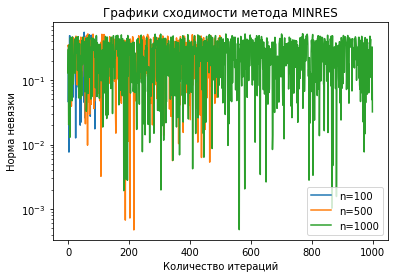

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def gen_matrix(n):
    A = np.random.rand(n, n)
    b = np.random.rand(n)
    return A, b

n_values = [100, 500, 1000]

max_iter = 1000
tol = 1e-6

for n in n_values:
    A, b = gen_matrix(n)
    x0 = np.zeros(n)
    x_minres = minres(A, b, x0, max_iter, tol)
    r_minres = np.abs(b - A.dot(x_minres))
    plt.semilogy(r_minres, label=f'n={n}')
plt.xlabel('Количество итераций')
plt.ylabel('Норма невязки')
plt.title('Графики сходимости метода MINRES')
plt.legend()
plt.show()


MINRES требует меньше памяти, чем CG, что делает его более подходящим для решения больших систем уравнений.

**Conjugate_gradient_method**

Этот метод используется для решения больших разреженных систем линейных уравнений.

Начальное приближение $x_0$ и начальное направление спуска $d_0 = r_0 = b - A x_0$.
Итерационно:

* Вычислить коэффициент $\alpha_k = \frac{(r_k, r_k)}{(d_k, A d_k)}$

* Вычислить новое приближение $x_{k+1} = x_k + \alpha_k d_k$.

* Вычислить новый остаток $r_{k+1} = r_k - \alpha_k A d_k$.

* Если $||r_{k+1}|| < tol$, где $tol$ - требуемая точность решения, завершить итерации и вернуть $x_{k+1}$.

* Вычислить коэффициент $\beta_k = \frac{(r_{k+1}, r_{k+1})}{(r_k, r_k)}$.

* Вычислить новое направление спуска $d_{k+1} = r_{k+1} + \beta_k d_k$.

Повторять шаг 2, пока не будет достигнуто требуемое условие сходимости.

In [3]:
import numpy as np

def conjugate_gradient_iter(A, b, x0, max_iter=1000, tol=1e-6):
    x = x0.copy()
    r = b - A @ x
    d = r.copy()
    for i in range(max_iter):
        alpha = np.dot(r, r) / np.dot(d, A @ d)
        x = x + alpha * d
        r_new = r - alpha * A @ d
        
    if np.linalg.norm(r_new) < tol:
        return x
    beta = np.dot(r_new, r_new) / np.dot(r, r)
    d = r_new + beta * d
    r = r_new
    return x

A = np.array([[4, -1, 0], [-1, 4, -1], [0, -1, 4]])
b = np.array([5, 5, 5])
x0 = np.zeros_like(b)
x = conjugate_gradient_iter(A, b, x0)
print(x)



[1875. 1875. 1875.]
